In [2]:
# import dependencies 
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

In [3]:
# Reading in the data from the provided CSV
file_path = "Resources/myopia.csv"

In [4]:
# saving the data as a variable
myopia_df = pd.read_csv(file_path)
# printing first five lines of dataframe 
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
# removing column in order to perform unsupervised ML, L2 var will be used for plotting
unsupervised_df = myopia_df.drop("MYOPIC", axis=1)
# printing abbreviated version to display that myopic was successfully removed 
unsupervised_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [6]:
# Create SS instances,needed to ensure that columns higher-valued columns ...
scaler = StandardScaler()
# are not given preference over features with lower thresholds 
scaled_data = scaler.fit_transform(unsupervised_df)

## Part 2A: Apply Dimensionality Reduction

In [18]:
# Dimensionality reduction refers to reducing number of input variables (columns/features)
pca = PCA(n_components=0.9)
# consider columns as dimensions in space and the rows of data as points in that space
pca_transformed_data = pca.fit_transform(scaled_data)

In [19]:
# COME BACK TO EDIT THIS CELL 

# Rather than specify the number of principal components (PC's) when you instantiate...
# the PCA model state the desired explained variance. 
# For example, say that a dataset has 100 features. 
# Using PCA(n_components=0.99)create model that will preserve ~ 99% of the...
# explained variance whether that means reducing the dataset to 80 PC's or 3.
# For this assignment, preserve 90% of the explained variance in dimensionality reduction.

In [20]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)
# Reduce dimensions
transformed_features = tsne.fit_transform(pca_transformed_data)

/Users/raycetimbes/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [21]:
# Checking that data set has 2 columns
transformed_features.shape

(618, 2)

## Part 2b: Prepare to plot the dataset

In [22]:
# The first column of transformed features
unsupervised_df['x'] = transformed_features[:,0]

# The second column of transformed features
unsupervised_df['y'] = transformed_features[:,1]

#  variable needed to betterv isualize the results graph
unsupervised_df["class"] = myopia_df["MYOPIC"]

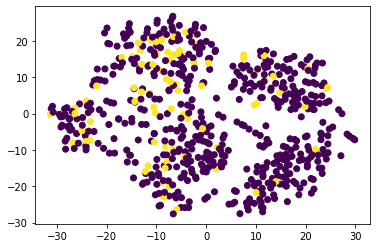

In [23]:
# Visualize the clusters using the class column df created in previous line of code 
plt.scatter(unsupervised_df['x'], unsupervised_df['y'], c=unsupervised_df["class"])

# print statement 
plt.show()

The two classes overlap quite a bit, but there seems to be four to five visible clusters.

## Part 3: Perform a Cluster Analysis with K-means

In [24]:
# Finding the best value for _k_ using the Elbow Curve to determine which k is optimal 

# checking for inflection point of each k, empty conatiner to hold inertia scores 
inertia = []

# Same as k = list(range(1, 11)), this list states that 1-10 number if clusters will be tested
k = [1,2,3,4,5,6,7,8,9,10]

# Using for loop to determine best number of clusters, iterating through list, can use each instead of i 
for i in k:
    # inertia is the sum of squared distances of the samples to the center 
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(unsupervised_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot, choosing two columns here 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

,k,inertia
0,1,485337.420071
1,2,345271.283871
2,3,251749.477320
3,4,208127.270218
4,5,181991.538155
5,6,160959.231949
6,7,145883.190936
7,8,137078.169086
8,9,128521.656430
9,10,122360.386156


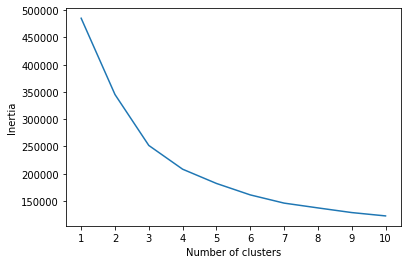

In [25]:
# unsupervised learning is better classification (log.) predictions versus numerical (lin.)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

It seems that the elbow curve is located at k=3, which means three should be the optimal number of clusters.

## Part 4: Recommendation

Based on these findings, the patients likely should not be clustered. If pressed however, and considering both the t-SNE(3)  and k-means(5) outputs, I would recommend 4 as the optimal number of groupings. 